# Sesi 7 & 8 Data Visualization

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [3]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [5]:
# Hapus kolom yang tidak dibutuhkan
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [6]:
# rename table
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

In [7]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
# Menambahkan kolom total diujung table
df_can['Total'] = df_can.sum(axis=1)

In [9]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')

In [10]:
df_can.set_index('Country', inplace=True)

In [11]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [12]:
print(df_can.loc['Japan'])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [13]:
# Pandas akan bingung untuk menampilkan data string dengan index, jadi akan diubah menjadi string
df_can.columns = list(map(str, df_can.columns))

In [14]:
years = list(map(str, range(1980, 2014)))

In [15]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Line Plot

In [17]:
# Question: Tampilkan data imigran ke Canada dari Haiti
haiti = df_can.loc['Haiti', years] # mengambil data imigrasi pertahun dari Haiti
haiti.head(10)

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
Name: Haiti, dtype: object

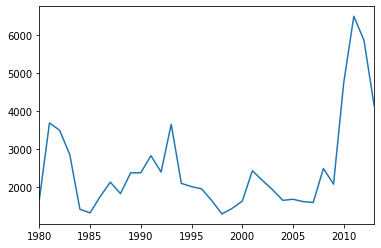

In [18]:
haiti.plot()

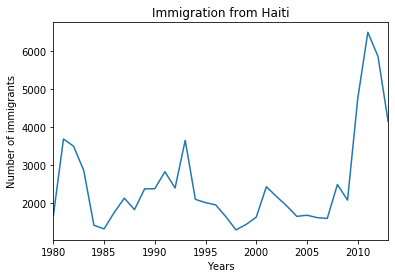

In [19]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # Menggunakan plt.show untuk menampilkan table yang update

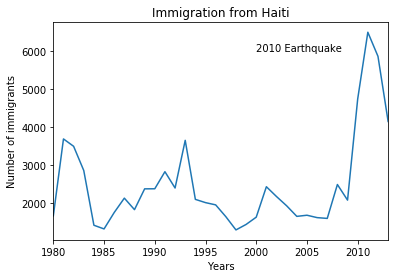

In [20]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Earthquake') #  2 angka pertama menjelaskan posisi axis x dan y pada table

plt.show()

In [21]:
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


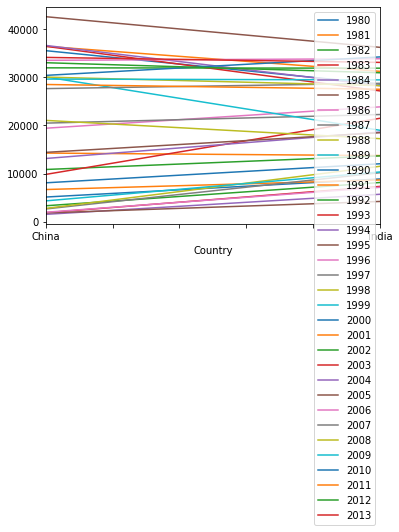

In [22]:
China_India.plot(kind='line') # Harus di transpose terlebih dahulu

In [23]:
df_CI = China_India.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


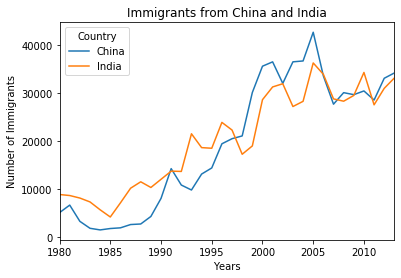

In [24]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

In [25]:
mpl.style.use(['ggplot']) # Style grafik yang berbeda

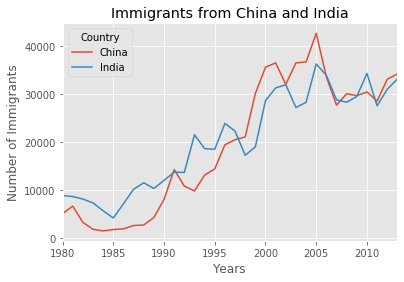

In [26]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

In [27]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [28]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

In [29]:
df_top5 = df_can.head(5) # Menjadikan 5 negara dengan imigran terbanyak sebagai variabel

In [30]:
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [31]:
df_top5 = df_top5[years].transpose() # Bentuknya harus seperti ini untuk membikin line plot

In [32]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


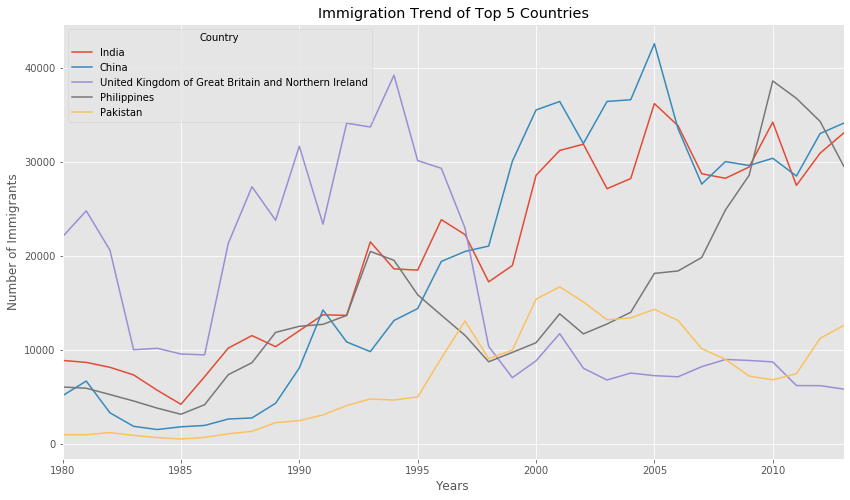

In [33]:
df_top5.plot(kind='line', figsize=(14, 8)) # figsize umumnya ngasal (trial & error)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Area Plot

In [34]:
df_top5.index = df_top5.index.map(int)

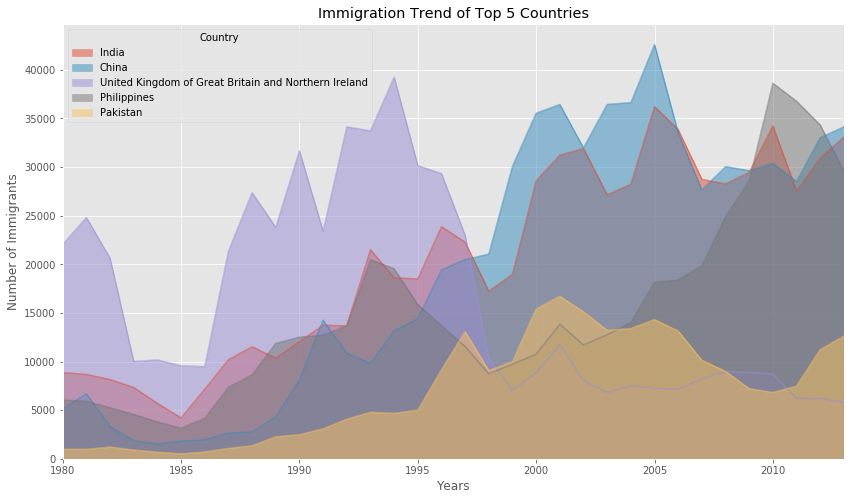

In [35]:
df_top5.plot(kind='area', figsize=(14, 8), stacked=False)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [36]:
## Scripting layer (procedural method)

# Option 1: This is what we have been using so far
df_top5.plot(kind='area', alpha=0.35, figsize(20, 10))

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# Artist layer (Object oriented method)

ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

SyntaxError: positional argument follows keyword argument (<ipython-input-36-83f5c66c3af7>, line 4)

In [37]:
df_least5 = df_can.tail(5)

In [38]:
df_least5 = df_least5[years].transpose()

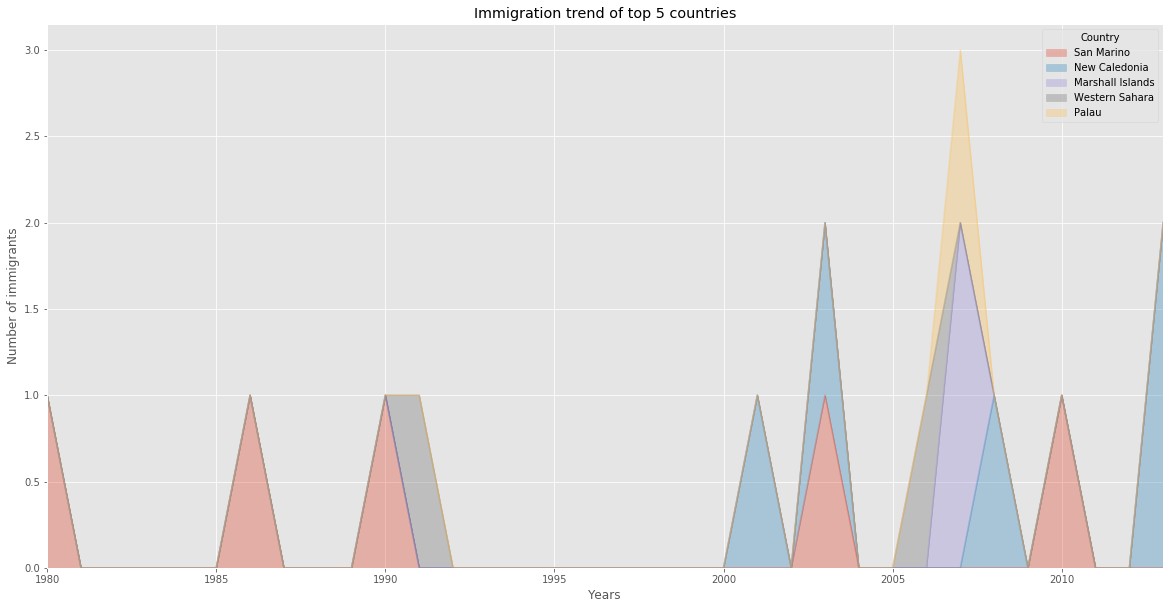

In [39]:
df_least5.plot(kind='area',
              alpha=0.35,
              figsize=(20, 10))

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

## Histograms

In [40]:
# Question: What is the frequency distribution of the number (population) of new immigrants from various countries to Canada in 2013

In [41]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [42]:
count, bin_edges = np.histogram(df_can['2013'])

print(count) # Banyaknya / frekuensi negara
print(bin_edges) # imigran

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


<function matplotlib.pyplot.show(*args, **kw)>

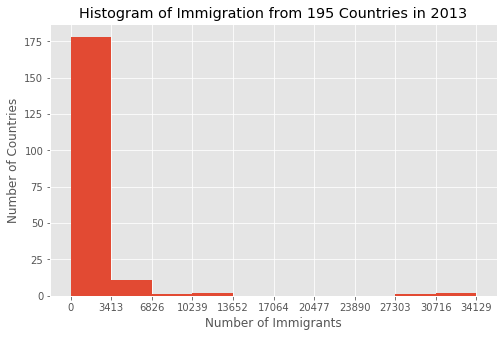

In [43]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize = (8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show

In [44]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


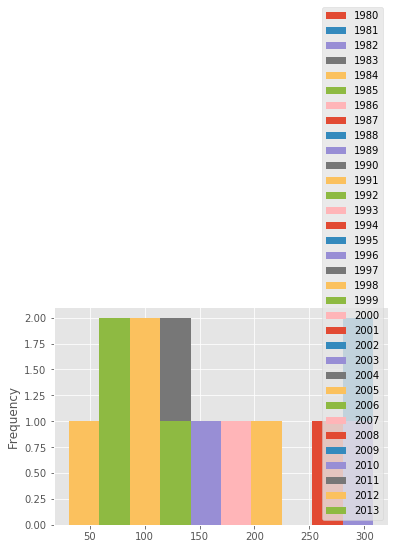

In [45]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [46]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


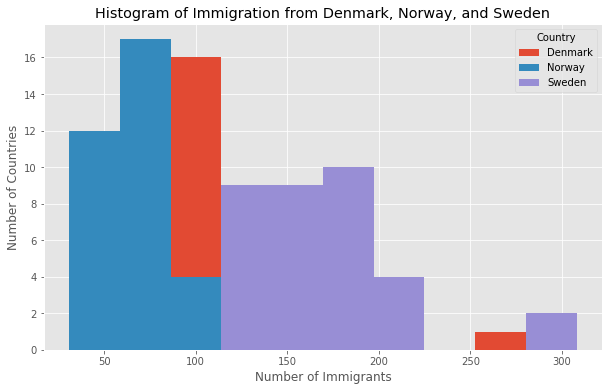

In [47]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

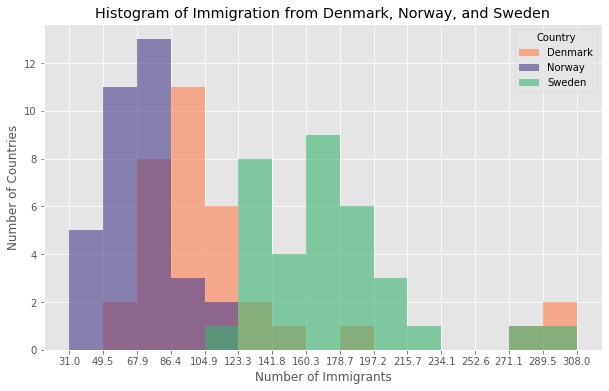

In [48]:
count,bin_edges = np.histogram(df_t, 15)

df_t.plot(kind='hist', 
          figsize=(10, 6), 
          bins=15, 
          alpha=0.6, 
          xticks=bin_edges, 
          color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

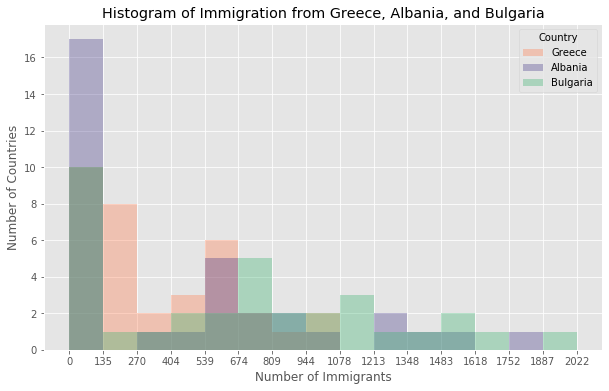

In [49]:
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'],years]
df_cof = df_cof.transpose()

count,bin_edges = np.histogram(df_cof, 15)
df_cof.plot(kind='hist', 
          figsize=(10, 6), 
          bins=15, 
          alpha=0.35, 
          xticks=bin_edges, 
          color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Chart

In [50]:
# Question = Lets compare the number of icelandic immigrants (country = 'Iceland') to Canada from 1980 to 2013

In [51]:
df_iceland = df_can.loc['Iceland', years]
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

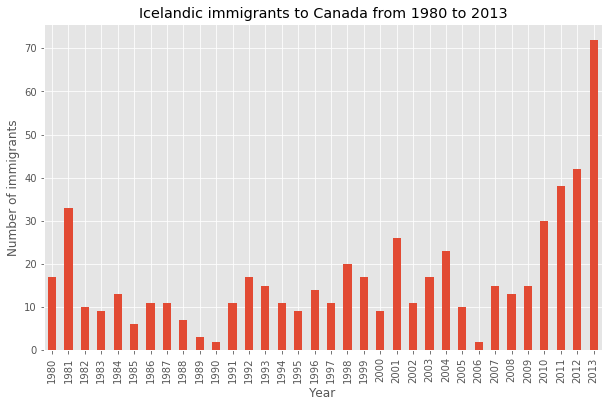

In [52]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

plt.show()

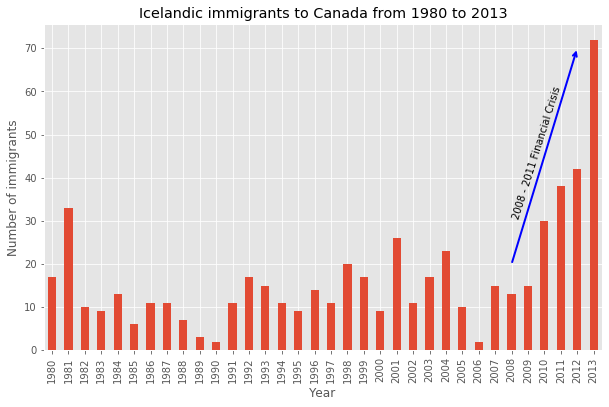

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

plt.annotate('',
            xy=(32, 70),
            xytext=(28, 20),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', 
                            connectionstyle='arc3', color='blue', lw=2)
            )

plt.annotate('2008 - 2011 Financial Crisis',
            xy=(28, 30),
            rotation=72.5,
            va='bottom',
            ha='left'
            )

plt.show()

## Horizontal Bar Plot

In [54]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

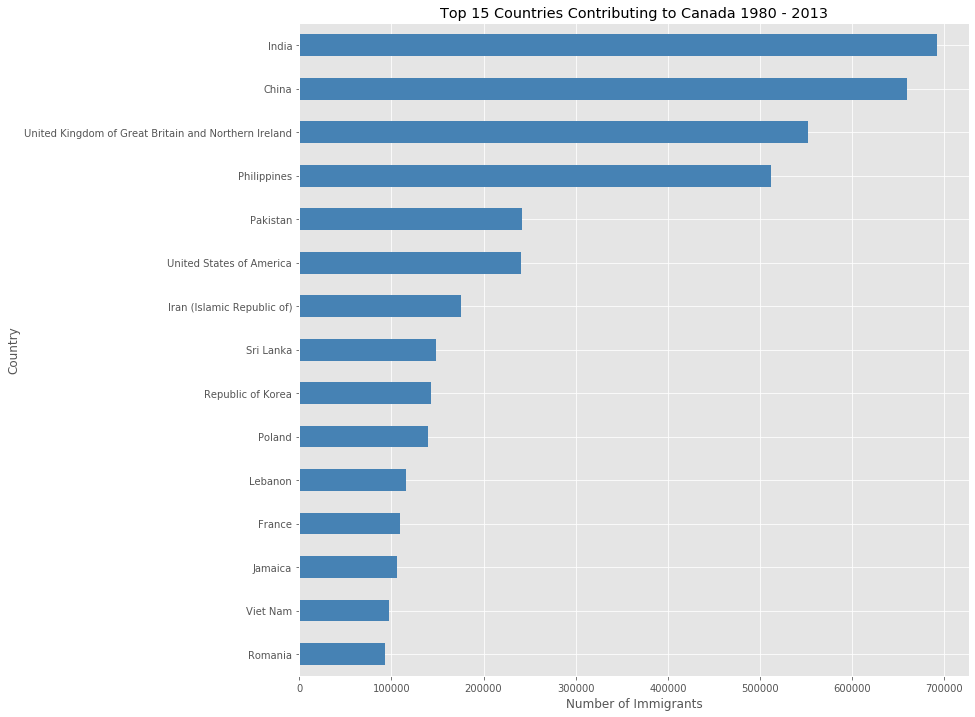

In [55]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to Canada 1980 - 2013')

plt.show()

## Pie Charts

In [56]:
df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


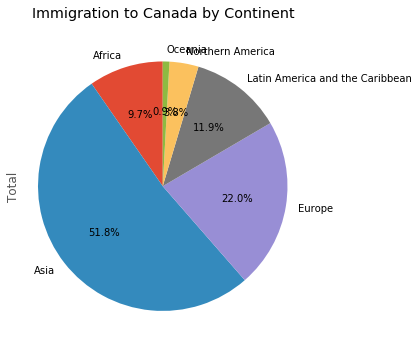

In [57]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            startangle=90,
                            autopct='%1.1f%%'
                           )

plt.title('Immigration to Canada by Continent')
plt.axis('equal')

plt.show()

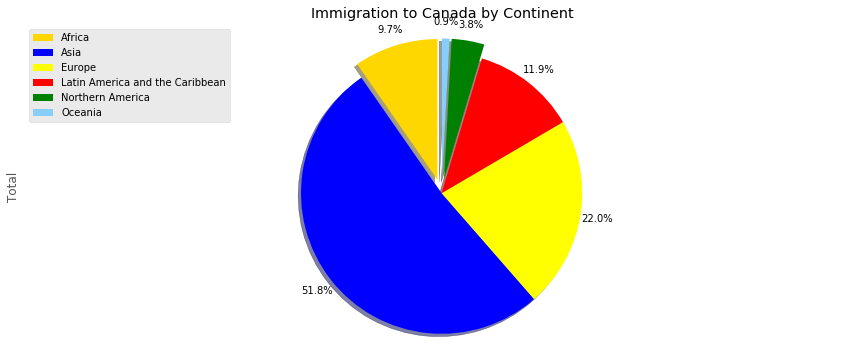

In [58]:
colors_list = ['gold', 'blue', 'yellow', 'red', 'green', 'lightskyblue']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # urutan variabelnya (continent)

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            startangle=90,
                            autopct='%1.1f%%',
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                           )

plt.title('Immigration to Canada by Continent')
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

In [59]:
# Berapa imigrant per continent ke Canada pada tahun 2013 saja

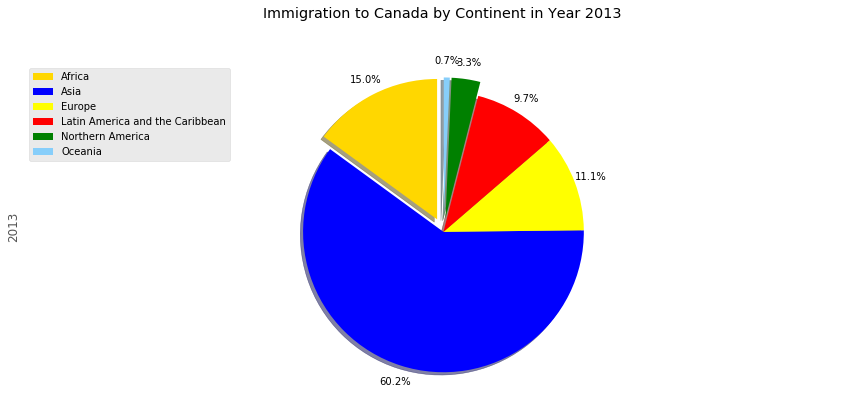

In [60]:
colors_list = ['gold', 'blue', 'yellow', 'red', 'green', 'lightskyblue']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            startangle=90,
                            autopct='%1.1f%%',
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                           )
plt.title('Immigration to Canada by Continent in Year 2013', y=1.12)
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

## Box Plot

In [63]:
df_japan = df_can.loc[['Japan'], years].transpose()

In [69]:
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


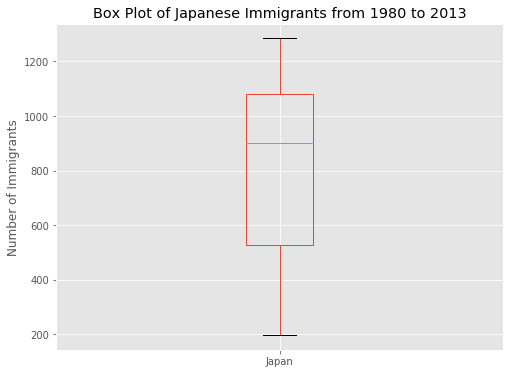

In [67]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Japanese Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [70]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [72]:
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [73]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


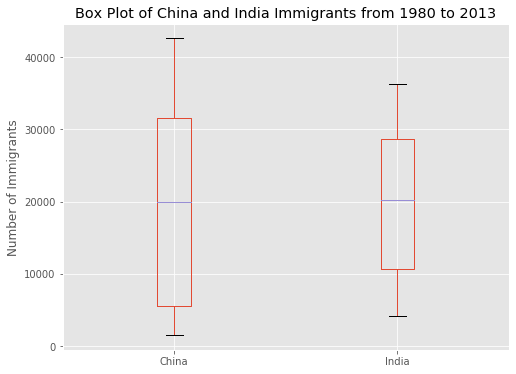

In [75]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of China and India Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

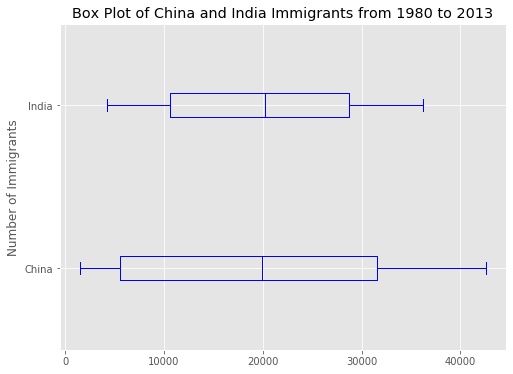

In [76]:
df_CI.plot(kind='box', figsize=(8, 6), color='blue', vert=False)

plt.title('Box Plot of China and India Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

## Scatter Plot

In [79]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index) # Mengganti index menjadi integer

df_tot.reset_index(inplace=True) # Untuk reset index ke default (0,1,2,3,...)

df_tot.columns = ['year', 'total'] # Ganti nama columnya

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<function matplotlib.pyplot.show(*args, **kw)>

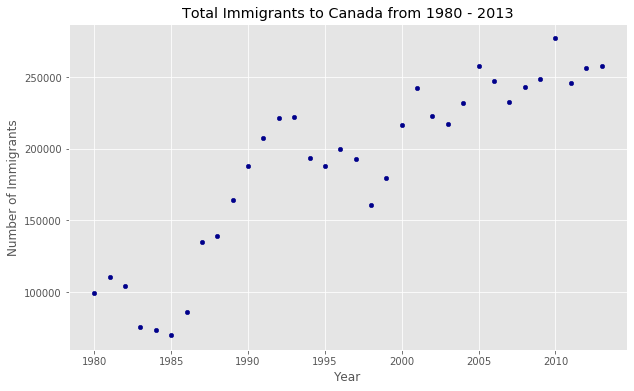

In [82]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigrants to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show

In [83]:
# Membuat prediksi data untuk tahun 2015
x = df_tot['year']
y = df_tot['total']

fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

'No. Immigrants = 5567 * Year + -10926195'

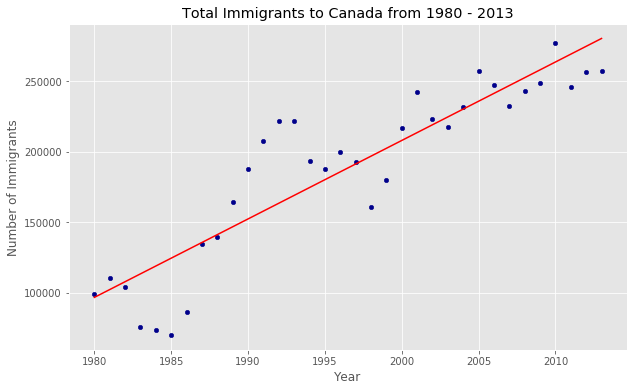

In [88]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigrants to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='red') # y=ax+b

plt.show

'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [89]:
5567 * 2015 - 10926195

291310

In [94]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int) # Ganti jadi integer

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


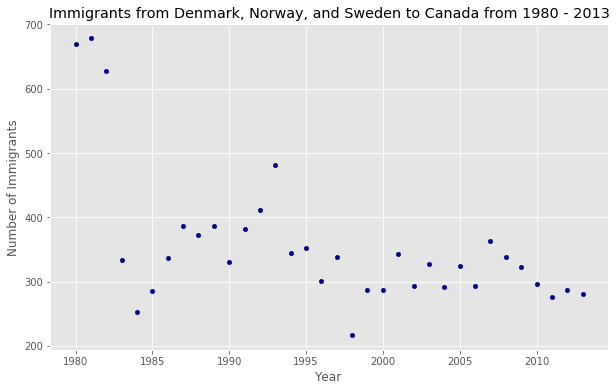

In [96]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Immigrants from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

## Word Clouds

In [97]:
!pip install wordcloud

In [98]:
from wordcloud import WordCloud, STOPWORDS # STOPWORDS = kata-kata seperti in, of, at, etc

In [99]:
alice_novel = open('alice_novel.txt', 'r').read()

In [100]:
stopwords = set(STOPWORDS)

In [101]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

# Sudah tertampung data wordcloudnya

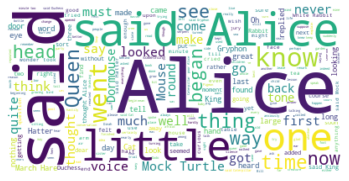

In [102]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

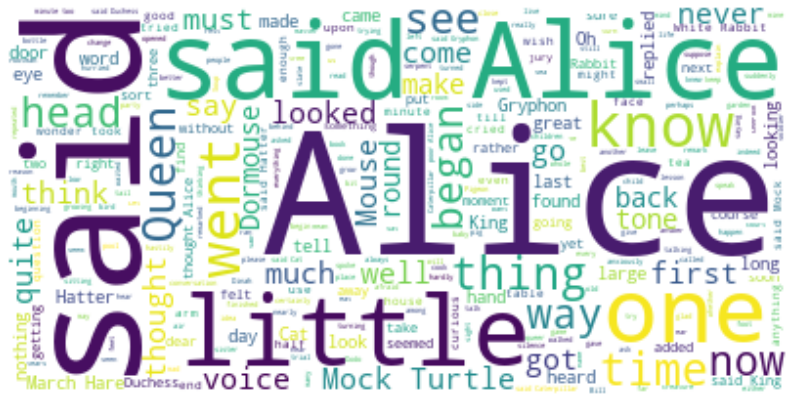

In [104]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear') # interpolation -> default
plt.axis('off')
plt.show()

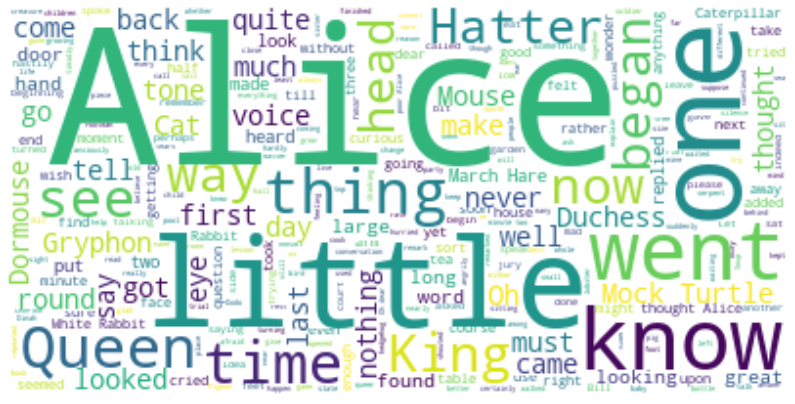

In [105]:
# Buat nambahin stopwords
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear') # interpolation -> default
plt.axis('off')
plt.show()

## Regression Plot

In [106]:
!pip install seaborn

import seaborn as sns

In [109]:
# Langkah2 ini untuk merapihkan table / data yang kita punya
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


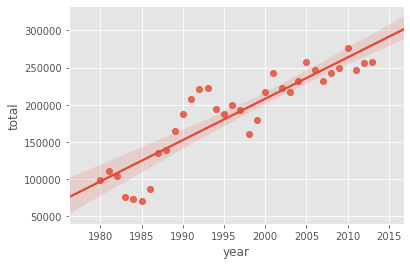

In [110]:
ax = sns.regplot(x='year', y='total', data=df_tot)

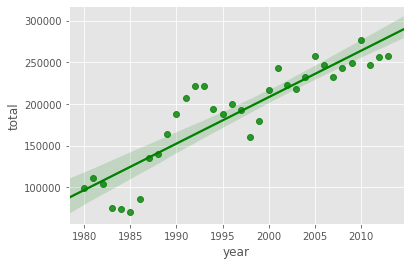

In [111]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

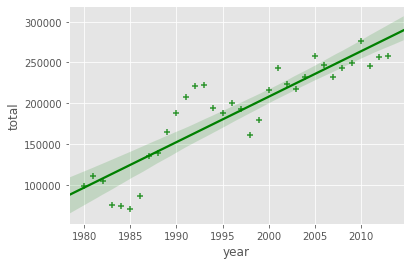

In [112]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

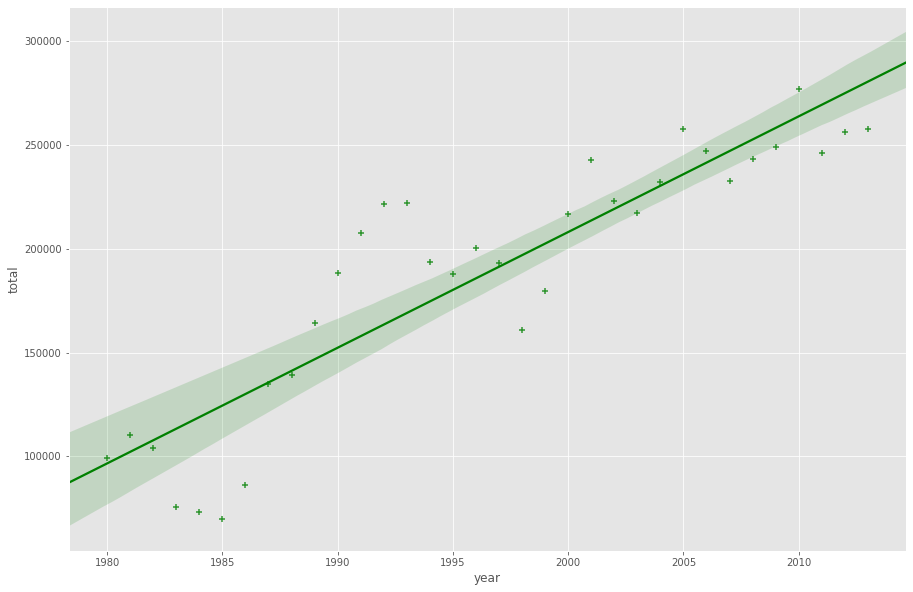

In [113]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigrants to Canada from 1980 - 2013')

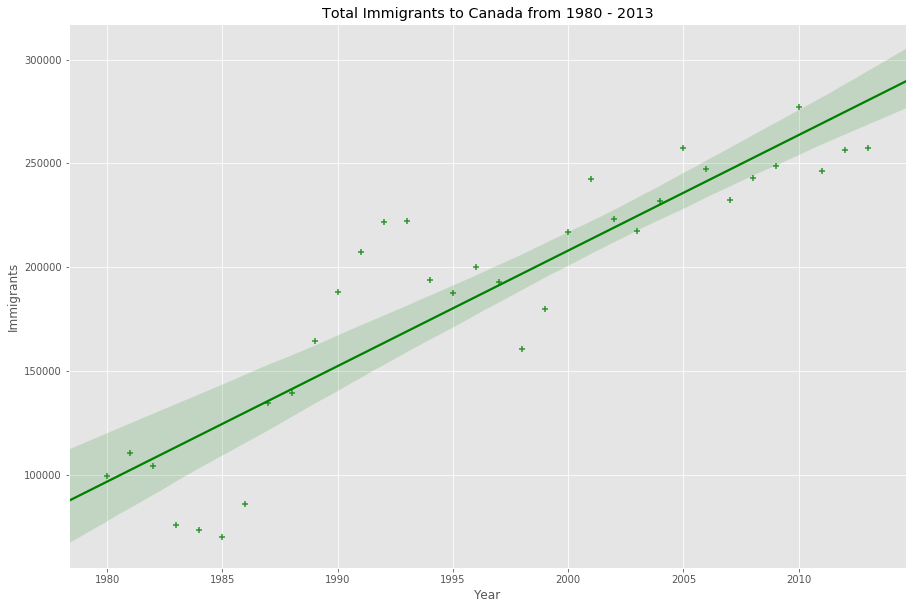

In [114]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Immigrants')
ax.set_title('Total Immigrants to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrants to Canada from 1980 - 2013')

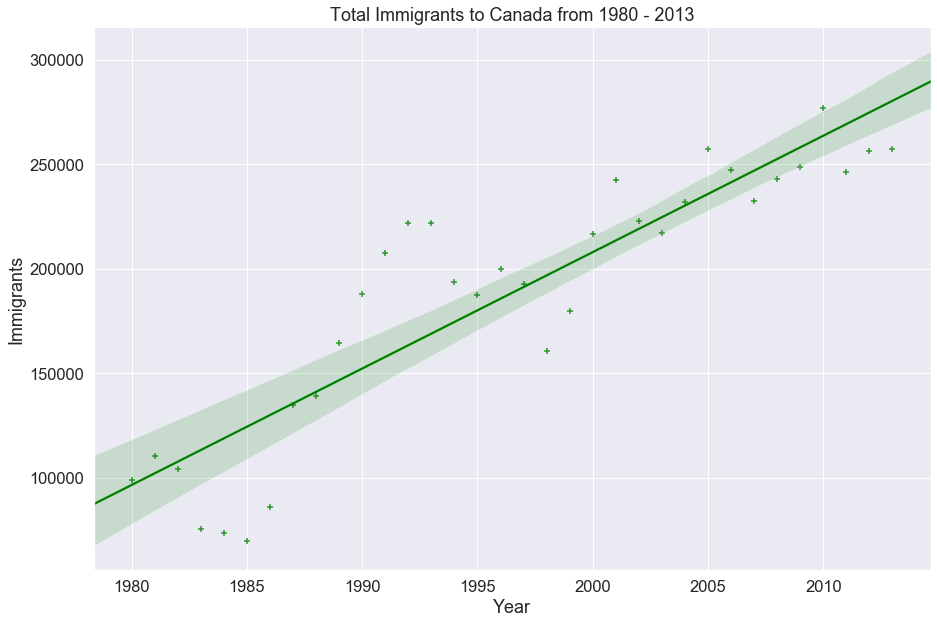

In [115]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5) # Gedein ukuran font

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Immigrants')
ax.set_title('Total Immigrants to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrants to Canada from 1980 - 2013')

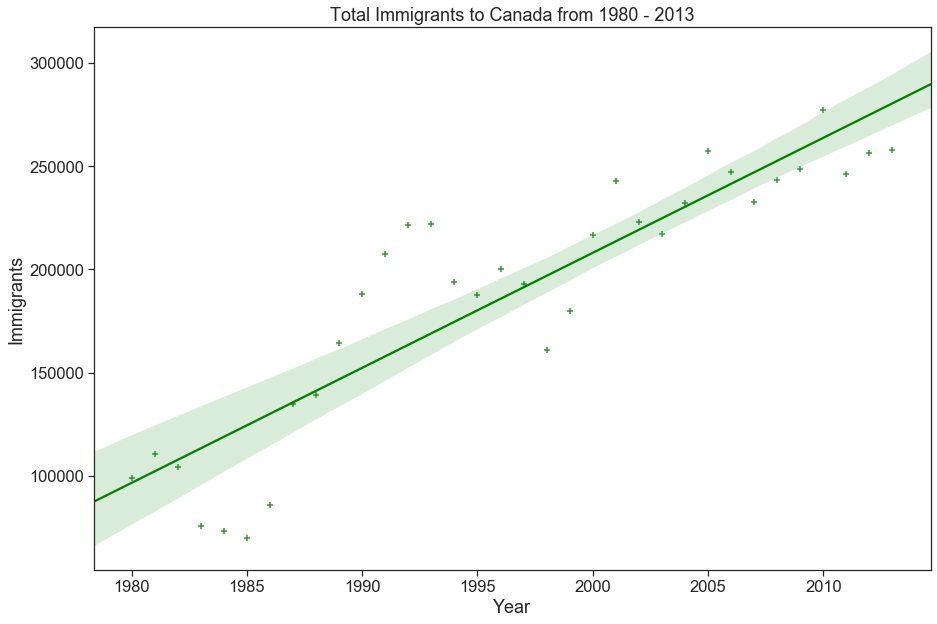

In [116]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5) # Gedein ukuran font
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Immigrants')
ax.set_title('Total Immigrants to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrants to Canada from 1980 - 2013')

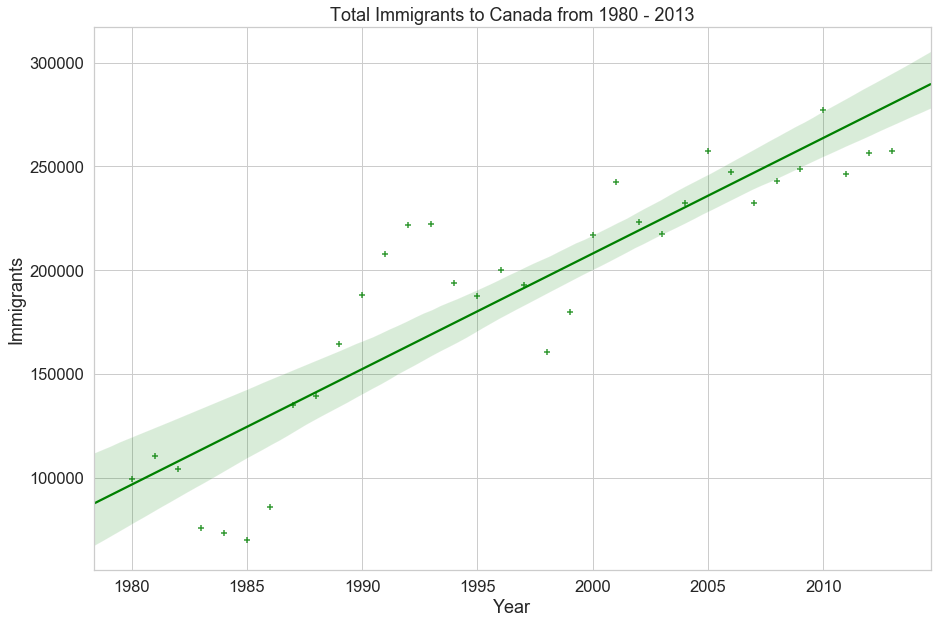

In [117]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5) # Gedein ukuran font
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Immigrants')
ax.set_title('Total Immigrants to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrants from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

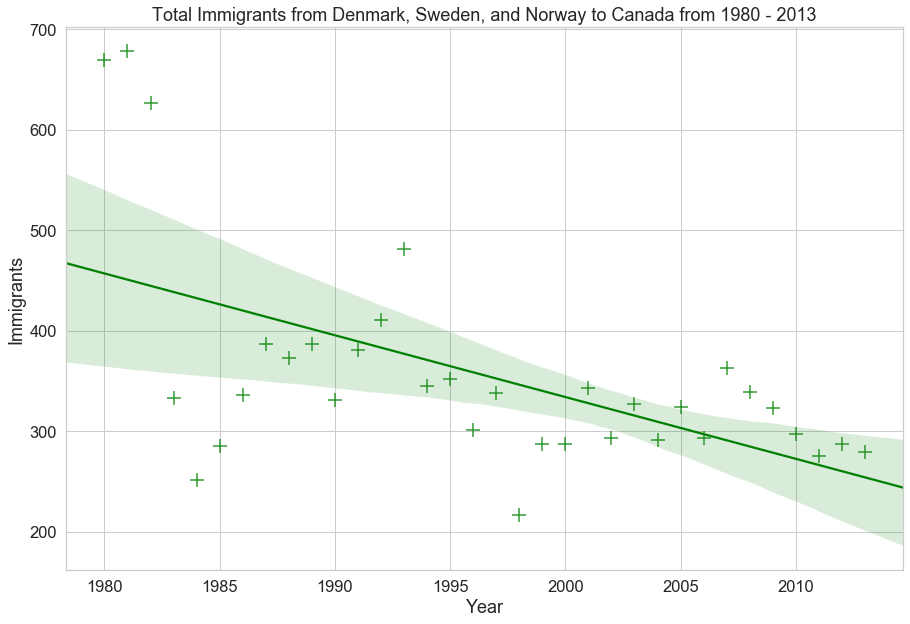

In [119]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose() # ambil datanya

df_total = pd.DataFrame(df_countries.sum(axis=1)) # buat dataframenya

df_total.reset_index(inplace=True) # ganti index jadi default

df_total.columns = ['year', 'total'] # ganti nama columnya

df_total['year'] = df_total['year'].astype(int) # ganti data pada year menjadi integer

plt.figure(figsize=(15, 10)) # pilih settingan grafiknya

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# tampilkan grafiknya
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel = 'Year', ylabel = 'Immigrants')
ax.set_title('Total Immigrants from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

In [120]:
!pip install folium

## Maps

In [122]:
import folium

In [123]:
world_map = folium.Map()

In [124]:
world_map

In [135]:
world_map = folium.Map(location=[-6.2607187,106.7816162], zoom_start=50) # lokasi Hacktiv8

world_map

In [136]:
world_map = folium.Map(location=[-6.2607187,106.7816162], zoom_start=15, tiles='Stamen Toner') # lokasi Hacktiv8

world_map

In [137]:
world_map = folium.Map(location=[-6.2607187,106.7816162], zoom_start=15, tiles='Stamen Terrain') # lokasi Hacktiv8

world_map

In [140]:
df_incidents = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [141]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [142]:
df_incidents.shape

(150500, 13)

In [144]:
limit = 100 # di limit datanya jadi 100 aja

df_incidents = df_incidents.iloc[0:limit, :]

In [145]:
df_incidents.shape

(100, 13)

In [146]:
latitude = 37.77
longitude = -122.42

In [147]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

sanfran_map

In [151]:
# Menampilkan polic incident yang ada pada san fransisco saja
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
            )
    )
    
sanfran_map.add_child(incidents)

In [152]:
incidents = folium.map.FeatureGroup()

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
            )
    )
    
sanfran_map.add_child(incidents)

In [153]:
# incidents = folium.map.FeatureGroup()
from folium import plugins

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.Marker(
            location=[lat, lng],
            popup=label,
            icon=None
    ).add_to(incidents)
    
sanfran_map

In [156]:
# folium ga punya border jadi harus ditambahin dulu
df_can.reset_index(inplace=True)
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

In [157]:
world_map